## Uber Data Analysis 


In [1]:
import pandas as pd
import numpy as np

In [30]:
data = pd.read_csv("data/uber_data.csv")

In [31]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [32]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [33]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [34]:
# let's get the days of the month 
def day_of_month(dt):
    return dt.day

data['DayOM'] = data['Date/Time'].map(day_of_month)

In [35]:
data.head()

,Date/Time,Lat,Lon,Base,DayOM
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [36]:
def week_day(dt):
    return dt.weekday()

data['WeekDay'] = data['Date/Time'].map(week_day)

In [37]:
def get_hour(dt):
    return dt.hour

In [38]:
data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,DayOM,WeekDay,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


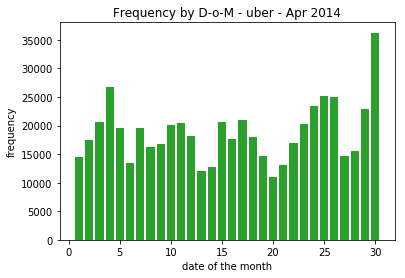

In [41]:
#let's do some analysis
import matplotlib.pyplot as plt
plt.hist(data.DayOM, bins=30, rwidth=.8, range=(0.5, 30.5))
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency by D-o-M - uber - Apr 2014')
plt.show()

In [43]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('DayOM').apply(count_rows)
by_date.head()

DayOM
1    14546
2    17474
3    20701
4    26714
5    19521
dtype: int64

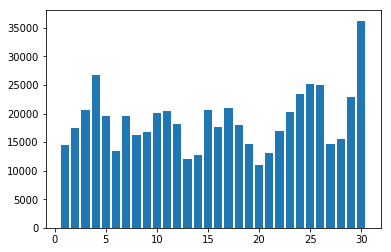

In [46]:
plt.bar(range(1, 31), by_date)
plt.show()

In [48]:
by_date_sorted = by_date.sort_values()
by_date_sorted.head()

DayOM
20    11017
13    12112
14    12674
21    13162
6     13445
dtype: int64

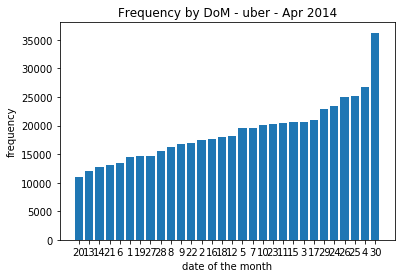

''

In [49]:
plt.bar(range(1, 31), by_date_sorted)
plt.xticks(range(1,31), by_date_sorted.index)
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency by DoM - uber - Apr 2014')
plt.show()
;

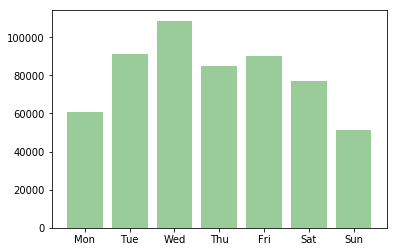

In [52]:
# analysis for week day
plt.hist(data.WeekDay, bins=7, range =(-.5,6.5), rwidth=.8, color='green', alpha=.4)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.show()

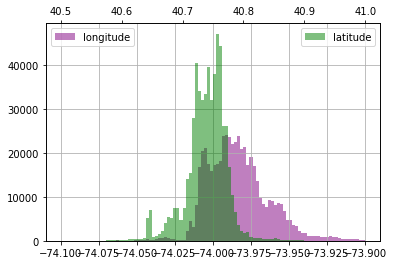

''

In [57]:
# plot location
plt.hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='purple', alpha=.5, label = 'longitude')
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(data['Lat'], bins=100, range = (40.5, 41), color='g', alpha=.5, label = 'latitude')
plt.legend(loc='best')
plt.show()
;